In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("uber.csv")

In [33]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [35]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [36]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [37]:
df.shape

(200000, 9)

In [38]:
df=df.drop(['Unnamed: 0', 'key'],axis=1)
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [39]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [40]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)

In [41]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [42]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime,errors='coerce',utc=True)

In [43]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [44]:
df['hour']=df.pickup_datetime.dt.hour
df['day']=df.pickup_datetime.dt.day
df['month']=df.pickup_datetime.dt.month
df['year']=df.pickup_datetime.dt.year
df['dayofweek']=df.pickup_datetime.dt.dayofweek

In [45]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,13.491335,15.704670,6.281795,2011.742440,3.048425
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,6.515531,8.687409,3.438925,1.856397,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [46]:
x=df['fare_amount'].value_counts()
print(type(x))
print("max count",x[6.50])
x

<class 'pandas.core.series.Series'>
max count 9684


fare_amount
6.50      9684
4.50      8247
8.50      7521
5.70      5858
5.30      5838
          ... 
140.25       1
190.00       1
45.16        1
28.20        1
89.10        1
Name: count, Length: 1244, dtype: int64

In [47]:
df=df.drop(['pickup_datetime'],axis=1)

In [48]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


<Axes: >

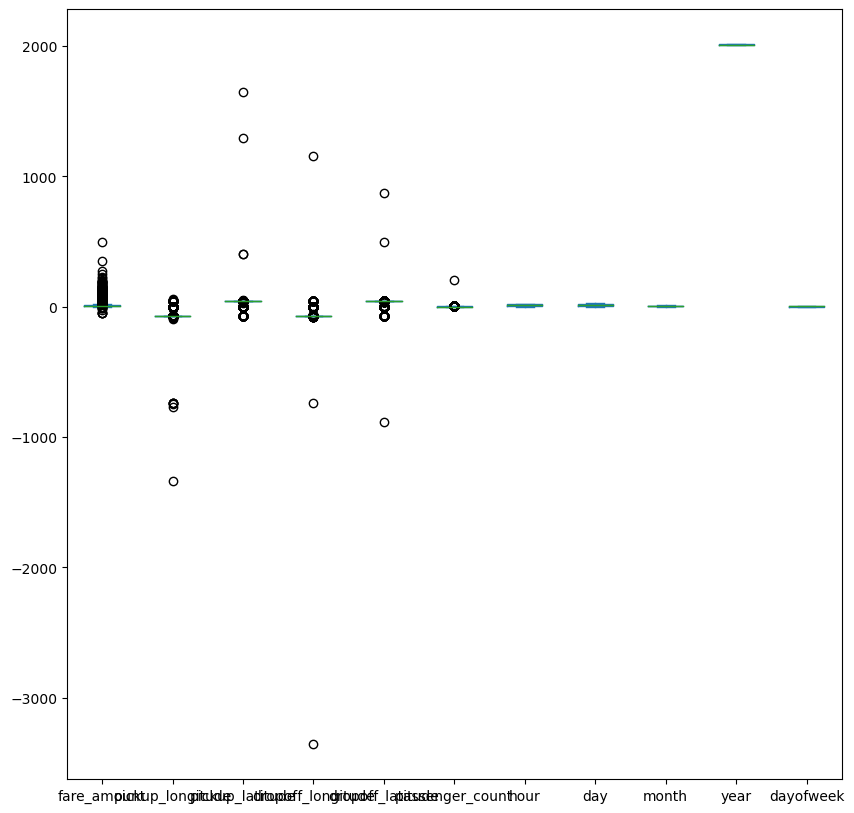

In [49]:
numofcol=len(df.columns)
df.plot(kind='box',subplots=False,layout=(7,2),figsize=(10,10))

In [50]:
def remove_outlier(df1,col):
    Q1=df1[col].quantile(0.25)
    Q2=df1[col].quantile(0.50)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    lower_whisker=Q1-1.5*IQR
    upper_whisker=Q3+1.5*IQR
    print("___________________________________________________________\n")
    print("col=",col,"Q1=",Q1,"Q2=",Q2,"Q3=",Q3)
    print("___________________________________________________________\n")
    df1[col]=np.clip(df1[col],lower_whisker,upper_whisker)
    return df1
def treat_outliers(df1,col_list):
    print("col_list",col_list)
    for c in col_list:
        df1=remove_outlier(df1,c)
    return df1

In [51]:
df=treat_outliers(df,df.columns)

col_list Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek'],
      dtype='object')
___________________________________________________________

col= fare_amount Q1= 6.0 Q2= 8.5 Q3= 12.5
___________________________________________________________

___________________________________________________________

col= pickup_longitude Q1= -73.992065 Q2= -73.98182299999999 Q3= -73.96715350000001
___________________________________________________________

___________________________________________________________

col= pickup_latitude Q1= 40.73479575 Q2= 40.752592 Q3= 40.767158
___________________________________________________________

___________________________________________________________

col= dropoff_longitude Q1= -73.991407 Q2= -73.98009300000001 Q3= -73.963658
___________________________________________________________

__________________________________

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

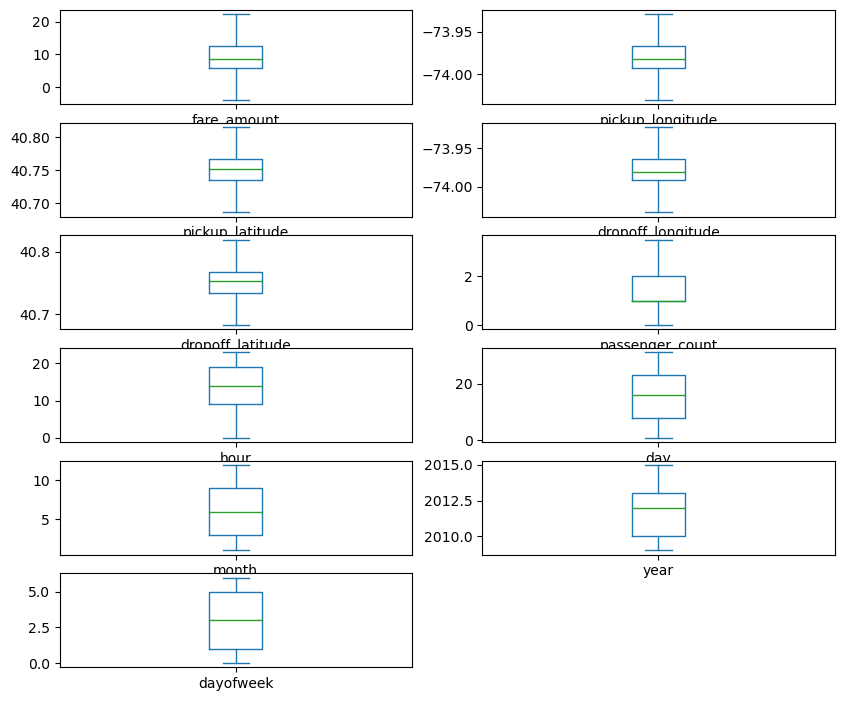

In [52]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(10,10))

In [53]:
incorrect_coordinates=df.loc[(df.pickup_latitude >90)| (df.pickup_latitude <-90)|
                             (df.dropoff_latitude >90)| (df.dropoff_latitude <-90)|
                            (df.pickup_longitude >180)| (df.pickup_longitude <-180)|
                            (df.dropoff_longitude >180)| (df.dropoff_longitude <-180)]

In [54]:
incorrect_coordinates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek


In [55]:
df.drop(incorrect_coordinates, inplace=True, errors="ignore")

In [56]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0,0,29,6,2009,0
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2


D:\Anaconda\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\Anaconda\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325,-0.046578,-0.004027,0.002394,0.011355,-0.003349
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550
hour,-0.023623,0.011579,0.029681,-0.046578,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947
day,0.004534,-0.003204,-0.001553,-0.004027,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617
month,0.030817,0.001169,0.001562,0.002394,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786
year,0.141277,0.010198,-0.014243,0.011355,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113


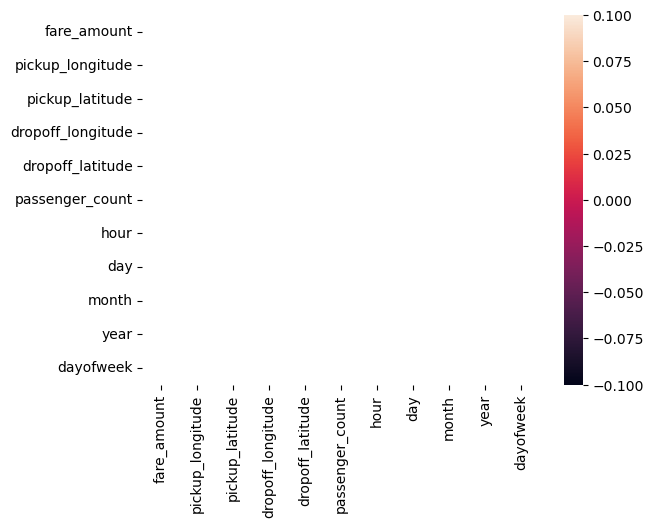

In [61]:
bool_df=df.isnull()
sns.heatmap(bool_df.corr())
df.corr()

<Axes: >

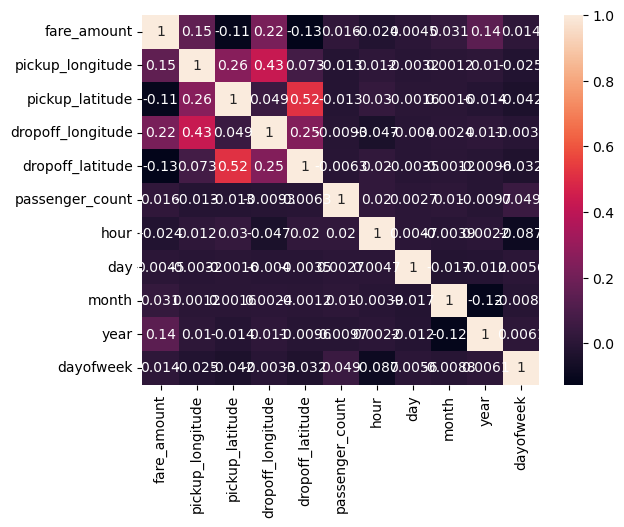

In [62]:
sns.heatmap(df.corr(),annot=True)

In [63]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek'],
      dtype='object')

In [66]:
x=df[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek']]
y=df['fare_amount']
y

0          7.50
1          7.70
2         12.90
3          5.30
4         16.00
          ...  
199995     3.00
199996     7.50
199997    22.25
199998    14.50
199999    14.10
Name: fare_amount, Length: 200000, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [68]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)
regression.intercept_
regression.coef_
y_pred=regression.predict(x_test)

In [69]:
Compare=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
Compare

,Actual,Predicted
190687,8.50,10.308651
188397,7.30,8.016170
172427,19.50,9.725884
13122,3.50,11.469616
11684,22.25,11.117578
...,...,...
155258,4.50,10.751148
98636,5.30,9.060908
57179,10.00,10.294764
101698,4.90,8.630556


<Axes: >

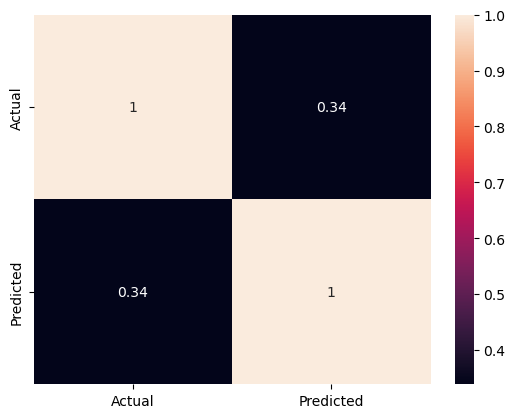

In [72]:
sns.heatmap(Compare.corr(),annot=True)

In [76]:
from sklearn.metrics import r2_score,mean_squared_error
R2=r2_score(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RSME=np.sqrt(MSE)
print(R2)
print(MSE)
print(RSME)

0.11456446651607233
26.109618591538148
5.109757194969067


In [79]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

array([ 9.915,  7.738, 21.407, ..., 10.573,  5.82 , 10.534])

In [80]:
R2=r2_score(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RSME=np.sqrt(MSE)
print(R2)
print(MSE)
print(RSME)

0.7914933245548661
6.148420256234158
2.479600825986747
